In [344]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
import random

In [345]:
limInf=-1
limSup=2
def f(T):
    ans =  (T**3-5*T+np.cos(T)*np.sin(20*T))*50
    return ans

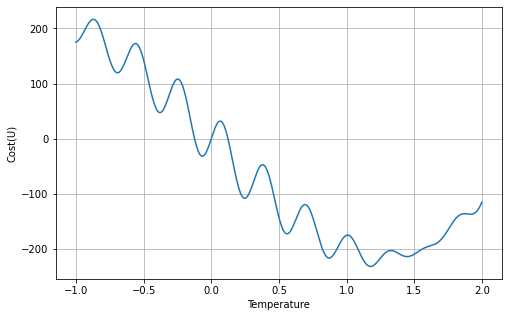

In [346]:
t = np.linspace(limInf,limSup,500)
fu=f(t)
fig1 = plt.figure(figsize=(8,5))
plt.plot(t,fu)
plt.xlabel("Temperature")
plt.ylabel("Cost(U)")
plt.grid(True)

In [347]:
numIndividuos = 20
numBits = 10

In [348]:
#Generar una cadena aleatoria de genes
def genDNAString(length:int):
    adnString = ''.join(random.choice(["0","1"]) for i in range(length))
    #print(adnString)
    return adnString

#decodificar una cadena de genes
def decodeDNAString(adnString:str,limInf:float,limSup:float):
    num = int(adnString,2)                  #Este es un int
    numBits = len(adnString)                #Número de bits
    base = (limSup-limInf)/(2**numBits-1)   #Resolución por cada bit
    return base*num + limInf

#definir una función que genere n individuos
def genIndividuals(cantidad:int,numBits):
    ans = []
    for i in range(cantidad):
        ans.append(genDNAString(numBits))
    return ans

In [349]:
#Generar población
población = genIndividuals(numIndividuos,numBits)
#Evaluar la fución
fx = []

for i in población:
    fx.append(f(decodeDNAString(i,limInf,limSup)))
#print(fx)


#Evaluar fitness
def evaluarFitness(fx):
    #Escalar fx a valores positivos si es necesario:
    if min(fx)<0:
        #print("Valor negativo encontrado")
        for i in range(len(fx)):
            fx[i] = fx[i]+abs(min(fx))
    Fi = []
    for eval in fx:
        Fi.append(1/(1+eval))
    return Fi
#sacar fitness
Fi = evaluarFitness(fx)
Fi

[0.03831639249781307,
 0.002421905023490528,
 0.006283725516120263,
 0.0049368487907987335,
 0.012706999297706247,
 0.030015960110870415,
 1.0,
 0.005521180985468094,
 0.0029957056302868483,
 0.0038236369817599442,
 0.06810204828514273,
 0.006191550776790306,
 0.006073744288907908,
 0.004117450199405273,
 0.004375863618678347,
 0.0033580576350868605,
 0.00737786962315208,
 1.0,
 0.004815376277377322,
 0.005120498831450215]

# TORNEO

In [350]:
def torneo(numIndividuos,Fi,población,numBits):
    padres = []
    ids = [j for j in range(numIndividuos)]
    for i in range(numIndividuos):
        oponente = random.choice(ids) #Elegir un oponente al azar
        # print(i,oponente)
        # print(Fi[i],Fi[oponente])
        if Fi[i]>Fi[oponente]:
            padres.append(población[i])
        else:
            padres.append(población[oponente])
    return padres

padres = torneo(numIndividuos,Fi,población,numBits)    #individuos ganadores
    

print(len(padres))
padres

20


['1101011011',
 '1011100101',
 '0111101001',
 '0101000011',
 '1000100110',
 '1101101011',
 '1011100101',
 '0101000000',
 '0101000011',
 '0111101001',
 '1101101111',
 '1101101011',
 '1101101011',
 '1000100110',
 '0000010100',
 '1011100101',
 '0111000000',
 '1010001000',
 '0111000000',
 '0000010100']

# RULETA

In [351]:
def ruleta(numIndividuos,Fi,población,numBits):
    total = 0
    for fi in Fi:
        total = total+fi
    #print(total)
    prob = []
    for fi in Fi:
        prob.append(fi/total)
    from numpy.random import choice
    padres = choice(población, numIndividuos, True, p=prob)
    #print(padres)
    return padres

In [352]:
población = genIndividuals(numIndividuos,numBits)
fx = []
for j in población:
    fx.append(f(decodeDNAString(j,limInf,limSup)))
#Evaluar el fitness
Fi = evaluarFitness(fx)
padres = ruleta(numIndividuos,Fi,población,numBits)
print(padres)

['1010000110' '1101101010' '1010000110' '1101101010' '1010000110'
 '1100110000' '1010000110' '1100110000' '1101101010' '1100110000'
 '1101101010' '1100110000' '1110011101' '1010000110' '1100110000'
 '1100110000' '1010000110' '1100110000' '1101101010' '1101101010']


# RANK

In [353]:
#probabilidades
def ps(n): #n es el num de individuos
    probs= []
    j=1
    suman=n*(n+1)/2 # es la suma de numeros consecutivos desde 1 hasta "n"
    #print(suman)
    for i in range(n):
        prob=j/suman
        probs.append(prob)
        j=j+1   #A calay !!
    return probs

In [354]:
# funcion Rank
def rank(numIndividuos,Fi,población,numBits):
    probabilidades = ps(numIndividuos)
    #print (población)
    
    #Ordenar las listas

    acoplamiento = zip(Fi,población)
    paresOrdenados = sorted(acoplamiento)
    tuples = zip(*paresOrdenados)
    basura,rank = [ list(tuple) for tuple in  tuples]
    
    from numpy.random import choice
    padres = choice(rank, numIndividuos, True, p=probabilidades)    #Ruleta
    
    # for r in rank:
    #     print(f(decodeDNAString(r,limInf,limSup)))
    # #print(probabilidades)
    return padres

In [355]:
# padres = rank(numIndividuos,Fi,población,numBits)
# print(padres)
# for p in padres:
#     print(decodeDNAString(p,limInf,limSup))

**Cruzado y Mutación**

In [356]:
def crossAndMutation(padres,numIndividuos,probMuta=0.02):
    #Cruzado
    from numpy.random import default_rng
    rng = default_rng()
    hijos=[]

    for i in range(numIndividuos):
        indices = rng.choice(numIndividuos,size=2,replace=False) #Que trucazo!!!
        #print(indices)
        puntocross = random.randint(1,numBits-2)
        #vamos a tomar la subcadena del padre 
        left = padres[indices[0]][0:puntocross]
        right = padres[indices[1]][puntocross:numBits]
        hijos.append(left+right)
    #     print(left,right)
    # print("hijos",hijos)
    # print(len(hijos))

    #Mutación
    for i in range(numIndividuos):
        if random.uniform(0,1) <= probMuta:
            #muta
            # print("EL HIJO\t",i,"M U T Ó")
            # print("Original",hijos[i])
            bitmutado = random.randint(0,numBits-1)
            #Porque python no deja modificar strings
            aux = list(hijos[i])                #Convertir a lista
            if hijos[i][bitmutado] == '0':      #Modificar el bit en la lista
                aux[bitmutado] = '1'
            else:
                aux[bitmutado] = '0'
            
            hijos[i] = ''.join(map(str, aux))   #Convertir la lista a string de nuevo   
            
            #print("Mutado\t",hijos[i])
    
    return hijos


# ESCOGER 

In [357]:
iteraciones = 40
numIndividuos = 100
numBits = 16
probMuta = 0.2
#Generar población:
población = genIndividuals(numIndividuos,numBits)

for i in range(iteraciones):
    #Evaluar la función
    fx = []
    for j in población:
        fx.append(f(decodeDNAString(j,limInf,limSup)))
    #Evaluar el fitness
    Fi = evaluarFitness(fx)
    padres = rank(numIndividuos,Fi,población,numBits)
    población = crossAndMutation(padres,numIndividuos,probMuta)


mejor = población[fx.index(min(fx))]
#print(fx)
print("El mejor individuo tiene la cadena =",mejor)
print(decodeDNAString(mejor,limInf,limSup))

El mejor individuo tiene la cadena = 1011100111000001
1.1768368047608146


In [358]:
mejor = población[fx.index(min(fx))]

#print(fx)
print("El mejor individuo tiene la cadena =",mejor)
print(decodeDNAString(mejor,limInf,limSup))

El mejor individuo tiene la cadena = 1011100111000001
1.1768368047608146


In [359]:
def optGen(método:str,numIndividuos:int,numBits:int,generaciones:int,probMuta=0.02,función=f,limInf=40,limSup=90):
    #Generar población:
    población = genIndividuals(numIndividuos,numBits)
    for i in range(generaciones):
        #Evaluar la función
        fx = []
        for j in población:
            fx.append(f(decodeDNAString(j,limInf,limSup)))
        #Evaluar el fitness
        Fi = evaluarFitness(fx)
        
        if(método=="torneo"):
            padres = torneo(numIndividuos,Fi,población,numBits)
        elif(método=="ruleta"):
            padres = ruleta(numIndividuos,Fi,población,numBits)
        elif(método=="rank"):
            padres = rank(numIndividuos,Fi,población,numBits)
        else:
            print("Error FATAL, método no reconocido")
            print("Métodos válidos: 'torneo','ruleta','rank'")
            return None,None,None
            
        población = crossAndMutation(padres,numIndividuos,probMuta)

        mejor = población[fx.index(min(fx))]
        xmin = decodeDNAString(mejor,limInf,limSup)
        fmin = f(xmin)
    
    return población,mejor,xmin,fmin

In [360]:
población,mejor,xmin,fmin = optGen("torneo",40,32,30,probMuta=0.02,función=f,limInf=limInf,limSup=limSup)
print(población)
print("El mejor individuo es:\t",mejor)
print("xmin = ","\033[92m",xmin,'\033[0m',sep="")
print("f(xmin) =",fmin)

['1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '0011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010', '1011100111010010']
El mejor individuo es:	 1011100111010010
xmin = 1.1776150148775462
f(xmin) = -231.9048301671697
